In [336]:
# The causalTree package is not in CRAN, the most common R repository.
# To install it, uncomment the next lines as appropriate.
# install.packages("devtools")  # if you don't have this installed yet.
# devtools::install_github('susanathey/causalTree') 
library(causalTree)

# use e.g., install.packages("grf") to install any of the following packages.
library(grf)
library(rpart)
library(glmnet)
library(splines)
library(MASS)
library(lmtest)
library(sandwich)
library(ggplot2)
library(haven)

In [338]:
data <- read_dta("C:/Users/Alexander/Dropbox/MGTECON634_Project/data/matching_panel5_treat12.dta")

In [12]:
is.data.frame(data)

[1] TRUE

In [13]:
# stay treat12 tenured level sex age clasification cpelec cpwater

# Clean Data

In [248]:
# Dummy for sex, and categorical values for level and clasification 
data$sex[data$sex == 1] <- 1
data$sex[data$sex == 2] <- 0
data$level <- as.factor(data$level)
data$clasification <- as.factor(data$clasification)

In [157]:
outcome <- "stay"
treatment <- "treat12"
covariates = c("tenured", "level", "sex", "age", "clasification", 
               "cpelec", "cpwater", "nlat_ie", "nlong_ie")

# Replicate main Results

In [270]:
# Treatment Effect on Retention for Teachers at Isolated/Rural Boundary
# Permanent
fmla <- formula(stay ~  treat12 + tenured + sex + age + 
                        factor(level) + factor(clasification) 
                        + cpelec + cpwater)
ols <- lm(fmla, data=subset(data, tenured==1 & strict_qualified == 1 & ano== 2016 ))
ols.res <- coeftest(ols, vcov=vcovHC(ols, type='HC2'))
#ols.res
summary(ols)


Call:
lm(formula = fmla, data = subset(data, tenured == 1 & strict_qualified == 
    1 & ano == 2016))

Residuals:
     Min       1Q   Median       3Q      Max 
-0.98581  0.05739  0.08545  0.11004  0.19524 

Coefficients: (1 not defined because of singularities)
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)             0.7054709  0.0176330  40.009   <2e-16 ***
treat12                 0.0002453  0.0040631   0.060   0.9519    
tenured                        NA         NA      NA       NA    
sex                    -0.0094226  0.0040820  -2.308   0.0210 *  
age                     0.0037790  0.0002617  14.439   <2e-16 ***
factor(level)2          0.0083060  0.0099193   0.837   0.4024    
factor(level)3          0.0049741  0.0113954   0.436   0.6625    
factor(clasification)2 -0.0086832  0.0065443  -1.327   0.1846    
factor(clasification)3 -0.0004257  0.0073458  -0.058   0.9538    
cpelec                  0.0227707  0.0094413   2.412   0.0159 *  
cpwater   

In [271]:
# Treatment Effect on Retention for Teachers at Isolated/Rural Boundary
# Qualified Temporary
fmla <- formula(stay ~  treat12 + tenured + sex + age + 
                        factor(level) + factor(clasification) 
                        + cpelec + cpwater)
ols <- lm(fmla, data=subset(data, tenured==0 & strict_qualified == 1 & ano== 2016 ))
ols.res <- coeftest(ols, vcov=vcovHC(ols, type='HC2'))
#ols.res
summary(ols)


Call:
lm(formula = fmla, data = subset(data, tenured == 0 & strict_qualified == 
    1 & ano == 2016))

Residuals:
    Min      1Q  Median      3Q     Max 
-0.4330 -0.2964 -0.2522  0.6522  0.8336 

Coefficients: (1 not defined because of singularities)
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)             0.110352   0.020276   5.442 5.30e-08 ***
treat12                 0.047713   0.006041   7.898 2.94e-15 ***
tenured                       NA         NA      NA       NA    
sex                     0.007348   0.006219   1.181   0.2374    
age                     0.003071   0.000405   7.584 3.47e-14 ***
factor(level)2          0.004622   0.008742   0.529   0.5970    
factor(level)3          0.009403   0.011835   0.794   0.4269    
factor(clasification)2 -0.008398   0.009140  -0.919   0.3582    
factor(clasification)3  0.062801   0.010961   5.729 1.02e-08 ***
cpelec                 -0.020036   0.010036  -1.996   0.0459 *  
cpwater                 0.00993

In [160]:
# Treatment Effect on Retention for Teachers at Isolated/Rural Boundary
# Unqualified Temporary
fmla <- formula(stay ~  treat12 + tenured + sex + age + 
                        factor(level) + factor(clasification) 
                        + cpelec + cpwater)
ols <- lm(fmla, data=subset(data, tenured==0 & strict_qualified == 0 & ano== 2016 ))
ols.res <- coeftest(ols, vcov=vcovHC(ols, type='HC2'))
ols.res


t test of coefficients:

                         Estimate Std. Error t value  Pr(>|t|)    
(Intercept)             0.1248870  0.0494152  2.5273 0.0115435 *  
treat12                 0.0408633  0.0209398  1.9515 0.0510916 .  
sex                    -0.0022900  0.0201888 -0.1134 0.9096973    
age                     0.0040742  0.0010582  3.8501 0.0001205 ***
factor(level)2         -0.0560187  0.0254597 -2.2003 0.0278596 *  
factor(level)3         -0.0599011  0.0321866 -1.8611 0.0628302 .  
factor(clasification)2  0.0320481  0.0249825  1.2828 0.1996507    
factor(clasification)3  0.0912484  0.0297241  3.0698 0.0021602 ** 
cpelec                 -0.0072515  0.0189478 -0.3827 0.7019619    
cpwater                -0.0298502  0.0211662 -1.4103 0.1585591    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


# Via causal trees

In [161]:
# # Only valid for randomized data!
# fmla <- paste(outcome, " ~", paste(covariates, collapse = " + "))
# X <- model.matrix(fmla, data)

In [162]:
# fmla <- formula(stay ~  tenured + sex + age)
# fmla

In [163]:
# # Prepare dataset
# fmla <- formula(paste0("~ 0 + ", paste0(covariates, collapse="+")))
# X <- model.matrix(fmla, data)

In [164]:
#stay treat12 tenured level sex age clasification cpelec cpwater

## Data from temporary teachers in 2016

In [339]:
data_main_col <- data.frame(data$stay, data$treat12,data$tenured, 
                            data$level, data$sex, data$age, data$clasification, 
                            data$cpelec, data$cpwater, data$nlat_ie, data$nlong_ie,
                           data$x_dim, data$y_dim, data$ano)
 
names(data_main_col) <- c('stay', 'treat12', 'tenured', 'level', 'sex', 'age', 
                       'clasification', 'cpelec', 'cpwater', "nlat_ie", "nlong_ie", "x_dim", "y_dim", "ano")
data_clean = na.omit(data_main_col)

In [340]:
data_clean <- subset(data_clean, ano== 2016 & tenured == 0)

In [341]:
dim(data_clean)

[1] 29606    14

In [342]:
dim(data_clean)

[1] 29606    14

# Using Blocks

In [343]:
# Treatment Effect on Retention for Teachers at Isolated/Rural Boundary
# Permanent
fmla <- formula(stay ~  treat12 + tenured + sex + age + 
                        factor(level) + factor(clasification) 
                        + cpelec + cpwater + x_dim + y_dim)
ols <- lm(fmla, data=data_clean)
ols.res <- coeftest(ols, vcov=vcovHC(ols, type='HC2'))
#ols.res
summary(ols)


Call:
lm(formula = fmla, data = data_clean)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.5335 -0.2946 -0.2451  0.6407  0.8880 

Coefficients: (1 not defined because of singularities)
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)            -8.669e-02  2.599e-02  -3.335 0.000854 ***
treat12                 4.380e-02  5.730e-03   7.645 2.16e-14 ***
tenured                        NA         NA      NA       NA    
sex                    -6.050e-03  5.816e-03  -1.040 0.298315    
age                     3.172e-03  3.581e-04   8.858  < 2e-16 ***
factor(level)2         -4.513e-03  8.048e-03  -0.561 0.574908    
factor(level)3          1.109e-03  1.080e-02   0.103 0.918253    
factor(clasification)2 -3.321e-03  8.413e-03  -0.395 0.693041    
factor(clasification)3  6.420e-02  1.002e-02   6.407 1.51e-10 ***
cpelec                  3.368e-03  8.505e-03   0.396 0.692085    
cpwater                 2.863e-02  5.929e-03   4.829 1.38e-06 ***
x_dim        

In [304]:
# Dividing data into three subsets
indices <- split(seq(nrow(data_clean)), sort(seq(nrow(data_clean)) %% 3))
names(indices) <- c('split', 'est', 'test')

In [305]:
fmla <- formula(stay ~  tenured + sex + age + 
                        factor(level) + factor(clasification)
                        + cpelec + cpwater + x_dim + y_dim)
fmla

stay ~ tenured + sex + age + factor(level) + factor(clasification) + 
    cpelec + cpwater + x_dim + y_dim

In [306]:
dim(data_clean)

[1] 29606    14

In [313]:
# Fitting the forest
ct.unpruned <- honest.causalTree(
  formula=fmla,            # Define the model
  data=data_clean[indices$split,],
  treatment=data_clean[indices$split, treatment],
  est_data=data_clean[indices$est,],
  est_treatment=data_clean[indices$est, treatment],
  minsize=100,                 # Min. number of treatment and control cases in each leaf
  HonestSampleSize=length(indices$est), #  Num obs used in estimation after splitting
  # We recommend not changing the parameters below
  split.Rule="CT",            # Define the splitting option
  cv.option="TOT",            # Cross validation options
  cp=0,                       # Complexity parameter
  split.Honest=TRUE,          # Use honesty when splitting
  cv.Honest=TRUE              # Use honesty when performing cross-validation
)


[1] 2
[1] "CT"


In [314]:
# Table of cross-validated values by tuning parameter.
ct.cptable <- as.data.frame(ct.unpruned$cptable)

In [315]:
# Obtain optimal complexity parameter to prune tree.
cp.selected <- which.min(ct.cptable$xerror)
cp.optimal <- ct.cptable[cp.selected, "CP"]

In [316]:
# Prune the tree at optimal complexity parameter.
ct.pruned <- prune(tree=ct.unpruned, cp=cp.optimal)

In [317]:
# Predict point estimates (on estimation sample)
tau.hat.est <- predict(ct.pruned, newdata=data_clean[indices$est,])

# Create a factor column 'leaf' indicating leaf assignment in the estimation set
num.leaves <- length(unique(tau.hat.est))
leaf <- factor(tau.hat.est, levels=sort(unique(tau.hat.est)), labels = seq(num.leaves))

In [318]:
num.leaves

[1] 11

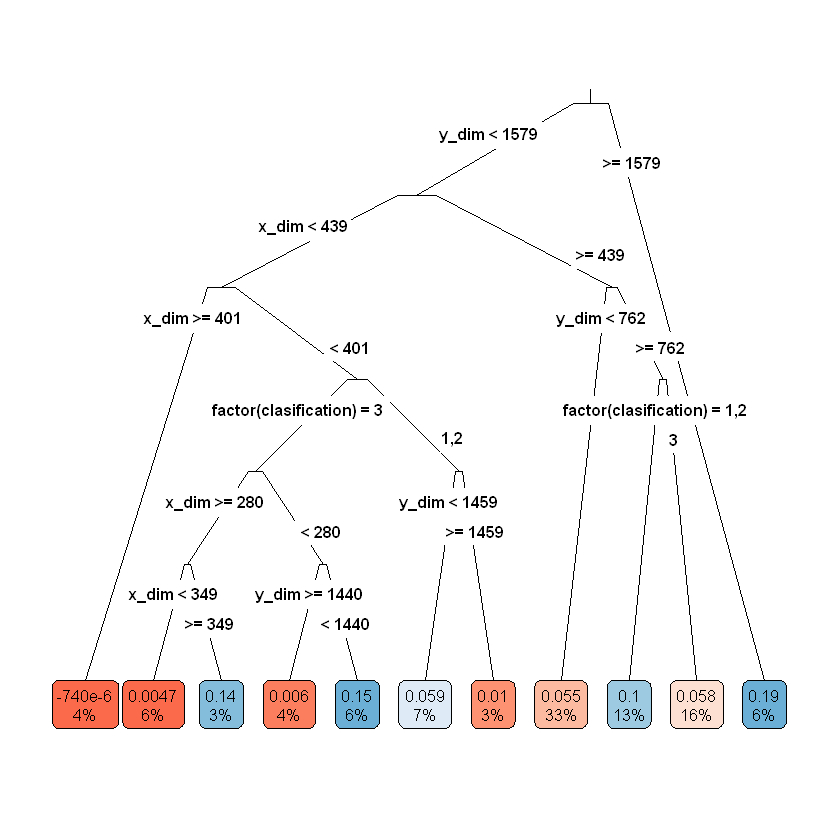

In [319]:
rpart.plot(
  x=ct.pruned,        # Pruned tree
  type=3,             # Draw separate split labels for the left and right directions
  fallen=TRUE,        # Position the leaf nodes at the bottom of the graph
  leaf.round=1,       # Rounding of the corners of the leaf node boxes
  extra=100,          # Display the percentage of observations in the node
  branch=.1,          # Shape of the branch lines
  box.palette="RdBu") # Palette for coloring the node

# Using Lat and Longitud

In [327]:
fmla <- formula(stay ~  tenured + sex + age + 
                        factor(level) + factor(clasification)
                        + cpelec + cpwater + nlat_ie + nlong_ie)
fmla

stay ~ tenured + sex + age + factor(level) + factor(clasification) + 
    cpelec + cpwater + nlat_ie + nlong_ie

[1] 2
[1] "CT"


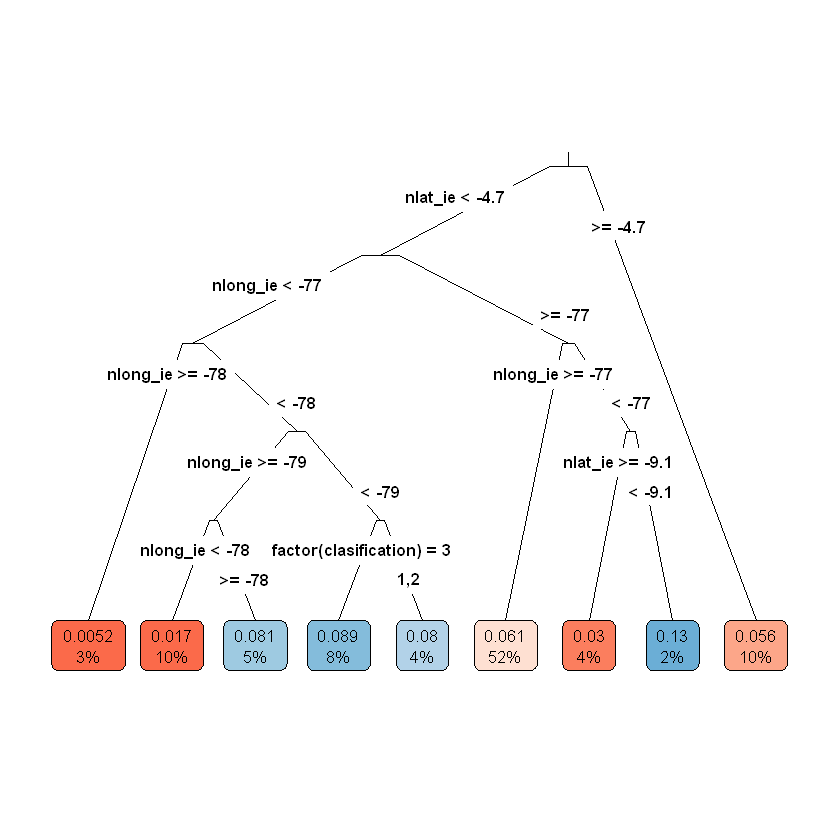

In [328]:
# Fitting the forest
ct.unpruned <- honest.causalTree(
  formula=fmla,            # Define the model
  data=data_clean[indices$split,],
  treatment=data_clean[indices$split, treatment],
  est_data=data_clean[indices$est,],
  est_treatment=data_clean[indices$est, treatment],
  minsize=120,                 # Min. number of treatment and control cases in each leaf
  HonestSampleSize=length(indices$est), #  Num obs used in estimation after splitting
  # We recommend not changing the parameters below
  split.Rule="CT",            # Define the splitting option
  cv.option="TOT",            # Cross validation options
  cp=0,                       # Complexity parameter
  split.Honest=TRUE,          # Use honesty when splitting
  cv.Honest=TRUE              # Use honesty when performing cross-validation
)

# Table of cross-validated values by tuning parameter.
ct.cptable <- as.data.frame(ct.unpruned$cptable)

# Obtain optimal complexity parameter to prune tree.
cp.selected <- which.min(ct.cptable$xerror)
cp.optimal <- ct.cptable[cp.selected, "CP"]

# Prune the tree at optimal complexity parameter.
ct.pruned <- prune(tree=ct.unpruned, cp=cp.optimal)

# Predict point estimates (on estimation sample)
tau.hat.est <- predict(ct.pruned, newdata=data_clean[indices$est,])

# Create a factor column 'leaf' indicating leaf assignment in the estimation set
num.leaves <- length(unique(tau.hat.est))
leaf <- factor(tau.hat.est, levels=sort(unique(tau.hat.est)), labels = seq(num.leaves))

rpart.plot(
  x=ct.pruned,        # Pruned tree
  type=3,             # Draw separate split labels for the left and right directions
  fallen=TRUE,        # Position the leaf nodes at the bottom of the graph
  leaf.round=1,       # Rounding of the corners of the leaf node boxes
  extra=100,          # Display the percentage of observations in the node
  branch=.1,          # Shape of the branch lines
  box.palette="RdBu") # Palette for coloring the node

In [251]:
data_clean_2016

,stay,treat12,tenured,level,sex,age,clasification,cpelec,cpwater,nlat_ie,nlong_ie,x_dim,y_dim,ano
,<dbl>,<dbl>,<dbl>,<fct>,<dbl+lbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
31,1,0,1,2,1,61,1,1,0,-14.16780,-72.79500,947.9789,460.7175,2016
33,1,0,1,2,0,61,2,1,1,-14.14340,-72.73650,954.4911,463.4155,2016
35,1,0,1,2,1,51,2,1,1,-14.14340,-72.73650,954.4911,463.4155,2016
37,1,0,1,2,0,56,2,1,1,-14.14340,-72.73650,954.4911,463.4155,2016
46,0,0,1,2,1,58,2,1,1,-14.19309,-72.79635,947.8286,457.9212,2016
50,1,0,1,2,0,64,2,1,1,-14.19309,-72.79635,947.8286,457.9212,2016
70,1,0,1,2,1,48,2,1,0,-14.00080,-72.57580,972.3802,479.1827,2016
71,1,0,1,2,1,42,2,1,0,-14.00080,-72.57580,972.3802,479.1827,2016
74,1,0,1,2,0,50,2,1,0,-14.00080,-72.57580,972.3802,479.1827,2016


In [255]:
# # Dividing data into three subsets
# indices <- split(seq(nrow(data_clean_2016)), sort(seq(nrow(data_clean_2016)) %% 3))
# names(indices) <- c('split', 'est', 'test')

In [344]:
# fmla <- formula(stay ~  tenured + sex + age + 
#                         factor(level) + factor(clasification)
#                         + cpelec + cpwater )

# # Fitting the forest
# ct.unpruned <- honest.causalTree(
#   formula=fmla,            # Define the model
#   data=data_clean_2016[indices$split,],
#   treatment=data_clean_2016[indices$split, treatment],
#   est_data=data_clean_2016[indices$est,],
#   est_treatment=data_clean_2016[indices$est, treatment],
#   minsize=1,                 # Min. number of treatment and control cases in each leaf
#   HonestSampleSize=length(indices$est), #  Num obs used in estimation after splitting
#   # We recommend not changing the parameters below
#   split.Rule="CT",            # Define the splitting option
#   cv.option="TOT",            # Cross validation options
#   cp=0,                       # Complexity parameter
#   split.Honest=TRUE,          # Use honesty when splitting
#   cv.Honest=TRUE              # Use honesty when performing cross-validation
# )

# # Table of cross-validated values by tuning parameter.
# ct.cptable <- as.data.frame(ct.unpruned$cptable)

# # Obtain optimal complexity parameter to prune tree.
# cp.selected <- which.min(ct.cptable$xerror)
# cp.optimal <- ct.cptable[cp.selected, "CP"]

# # Prune the tree at optimal complexity parameter.
# ct.pruned <- prune(tree=ct.unpruned, cp=cp.optimal)

# # Predict point estimates (on estimation sample)
# tau.hat.est <- predict(ct.pruned, newdata=data_clean_2016[indices$est,])

# # Create a factor column 'leaf' indicating leaf assignment in the estimation set
# num.leaves <- length(unique(tau.hat.est))
# leaf <- factor(tau.hat.est, levels=sort(unique(tau.hat.est)), labels = seq(num.leaves))

# rpart.plot(
#   x=ct.pruned,        # Pruned tree
#   type=3,             # Draw separate split labels for the left and right directions
#   fallen=TRUE,        # Position the leaf nodes at the bottom of the graph
#   leaf.round=1,       # Rounding of the corners of the leaf node boxes
#   extra=100,          # Display the percentage of observations in the node
#   branch=.1,          # Shape of the branch lines
#   box.palette="RdBu") # Palette for coloring the node

In [192]:
# Assuming discontinuity generates RCT

In [221]:
# Auxiliary function to computes adjusted p-values 
# following the Romano-Wolf method.
# For a reference, see http://ftp.iza.org/dp12845.pdf page 8
#  t.orig: vector of t-statistics from original model
#  t.boot: matrix of t-statistics from bootstrapped models
romano_wolf_correction <- function(t.orig, t.boot) {
  abs.t.orig <- abs(t.orig)
  abs.t.boot <- abs(t.boot)
  abs.t.sorted <- sort(abs.t.orig, decreasing = TRUE)

  max.order <- order(abs.t.orig, decreasing = TRUE)
  rev.order <- order(max.order)

  M <- nrow(t.boot)
  S <- ncol(t.boot)

  p.adj <- rep(0, S)
  p.adj[1] <- mean(apply(abs.t.boot, 1, max) > abs.t.sorted[1])
  for (s in seq(2, S)) {
    cur.index <- max.order[s:S]
    p.init <- mean(apply(abs.t.boot[, cur.index, drop=FALSE], 1, max) > abs.t.sorted[s])
    p.adj[s] <- max(p.init, p.adj[s-1])
  }
  p.adj[rev.order]
}

# Computes adjusted p-values for linear regression (lm) models.
#    model: object of lm class (i.e., a linear reg model)
#    indices: vector of integers for the coefficients that will be tested
#    cov.type: type of standard error (to be passed to sandwich::vcovHC)
#    num.boot: number of null bootstrap samples. Increase to stabilize across runs.
# Note: results are probabilitistic and may change slightly at every run. 
#
# Adapted from the p_adjust from from the hdm package, written by Philipp Bach.
# https://github.com/PhilippBach/hdm_prev/blob/master/R/p_adjust.R
summary_rw_lm <- function(model, indices=NULL, cov.type="HC2", num.boot=10000) {

  if (is.null(indices)) {
    indices <- 1:nrow(coef(summary(model)))
  }
  # Grab the original t values.
  summary <- coef(summary(model))[indices,,drop=FALSE]
  t.orig <- summary[, "t value"]

  # Null resampling.
  # This is a trick to speed up bootstrapping linear models.
  # Here, we don't really need to re-fit linear regressions, which would be a bit slow.
  # We know that betahat ~ N(beta, Sigma), and we have an estimate Sigmahat.
  # So we can approximate "null t-values" by
  #  - Draw beta.boot ~ N(0, Sigma-hat) --- note the 0 here, this is what makes it a *null* t-value.
  #  - Compute t.boot = beta.boot / sqrt(diag(Sigma.hat))
  Sigma.hat <- vcovHC(model, type=cov.type)[indices, indices]
  se.orig <- sqrt(diag(Sigma.hat))
  num.coef <- length(se.orig)
  beta.boot <- mvrnorm(n=num.boot, mu=rep(0, num.coef), Sigma=Sigma.hat)
  t.boot <- sweep(beta.boot, 2, se.orig, "/")
  p.adj <- romano_wolf_correction(t.orig, t.boot)

  result <- cbind(summary[,c(1,2,4),drop=F], p.adj)
  colnames(result) <- c('Estimate', 'Std. Error', 'Orig. p-value', 'Adj. p-value')
  result
}

In [222]:
# This is only valid in randomized datasets.
fmla <- paste0(outcome, ' ~ ', paste0(treatment, '* leaf'))
if (num.leaves == 1) {
  print("Skipping since there's a single leaf.")

} else if (num.leaves == 2) {
  # if there are only two leaves, no need to correct for multiple hypotheses
  ols <- lm(fmla, data=transform(data[indices$est,], leaf=leaf))
  coeftest(ols, vcov=vcovHC(ols, 'HC2'))[4,,drop=F]

} else {
  # if there are three or more leaves, use Romano-Wolf test correction 
  ols <- lm(fmla, data=transform(data[indices$est,], leaf=leaf))
  interact <- which(sapply(names(coef(ols)), function(x) grepl(paste0(treatment, ":"), x)))
  summary_rw_lm(ols, indices=interact, cov.type = 'HC2')
}

,Estimate,Std. Error,Orig. p-value,Adj. p-value
treat12:leaf2,0.04072883,0.01182084,5.704043e-04,0.0012
treat12:leaf3,0.05738517,0.02129724,7.051787e-03,0.0060
treat12:leaf4,0.06006751,0.01923481,1.791984e-03,0.0028
treat12:leaf5,0.11523462,0.01697153,1.133560e-11,0.0000
treat12:leaf6,0.12835512,0.01266306,4.006649e-24,0.0000
treat12:leaf7,0.14007956,0.02479708,1.621405e-08,0.0000
treat12:leaf8,0.14244341,0.02613091,5.025883e-08,0.0000
treat12:leaf9,0.15301739,0.01527962,1.378796e-23,0.0000


In [ ]:
data 

# Average Covariate values wihtin each leaf

In [226]:
covariates = c("tenured", "sex", "age", "cpelec", "cpwater", "nlat_ie", "nlong_ie")

In [206]:
data <- data_clean

In [229]:
# covariate = "clasification"

# fmla <- formula(paste0(covariate, "~ 0 + leaf"))
# ols <- lm(fmla, data=transform(data[indices$est,], leaf=leaf))
# ols.res <- coeftest(ols, vcov=vcovHC(ols, "HC2"))

# # Retrieve results
# avg <- ols.res[,1]
# stderr <- ols.res[,2]

# # Tally up results
# data.frame(covariate, avg, stderr, leaf=paste0("Leaf", seq(num.leaves)), 
#          # Used for coloring
#          scaling=pnorm((avg - mean(avg))/sd(avg)), 
#          # We will order based on how much variation is 'explain' by the averages
#          # relative to the total variation of the covariate in the data
#          variation=sd(avg) / sd(data[,covariate]),
#          # String to print in each cell in heatmap below
#          labels=paste0(signif(avg, 3), "\n", "(", signif(stderr, 3), ")"))

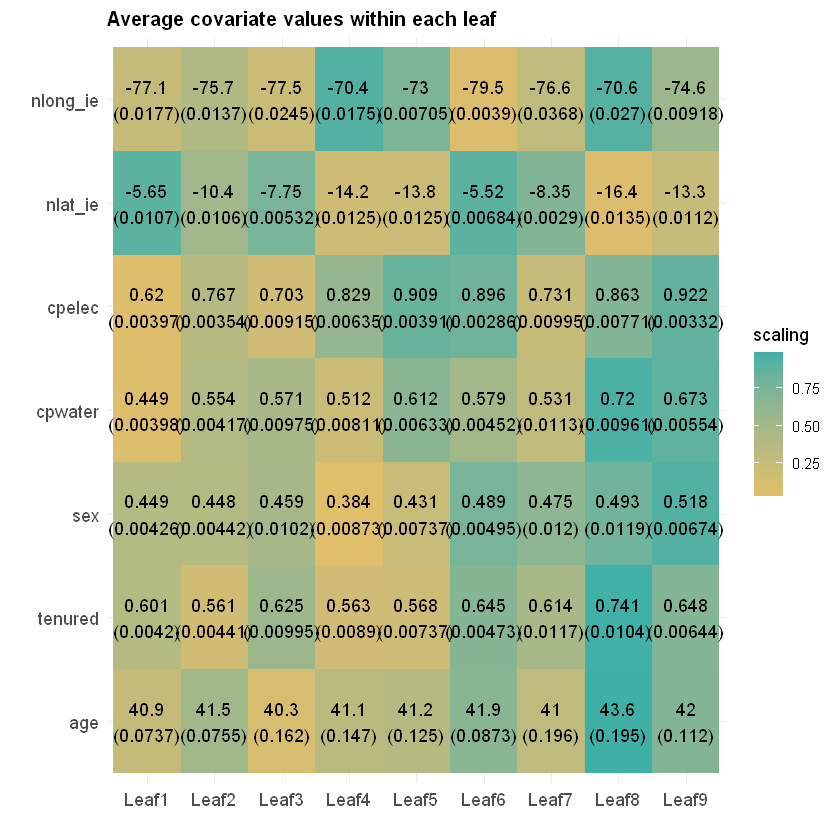

In [230]:
df <- mapply(function(covariate) {
      # Looping over covariate names
      # Compute average covariate value per leaf (with correct standard errors)
      fmla <- formula(paste0(covariate, "~ 0 + leaf"))
      ols <- lm(fmla, data=transform(data[indices$est,], leaf=leaf))
      ols.res <- coeftest(ols, vcov=vcovHC(ols, "HC2"))
    
      # Retrieve results
      avg <- ols.res[,1]
      stderr <- ols.res[,2]
      
      # Tally up results
      data.frame(covariate, avg, stderr, leaf=paste0("Leaf", seq(num.leaves)), 
                 # Used for coloring
                 scaling=pnorm((avg - mean(avg))/sd(avg)), 
                 # We will order based on how much variation is 'explain' by the averages
                 # relative to the total variation of the covariate in the data
                 variation=sd(avg) / sd(data[,covariate]),
                 # String to print in each cell in heatmap below
                 labels=paste0(signif(avg, 3), "\n", "(", signif(stderr, 3), ")"))
}, covariates, SIMPLIFY = FALSE)

df <- do.call(rbind, df)

# a small optional trick to ensure heatmap will be in decreasing order of 'variation'
df$covariate <- reorder(df$covariate, order(df$variation))

# plot heatmap
ggplot(df) +
    aes(leaf, covariate) +
    geom_tile(aes(fill = scaling)) + 
    geom_text(aes(label = labels)) +
    scale_fill_gradient(low = "#E1BE6A", high = "#40B0A6") +
    ggtitle(paste0("Average covariate values within each leaf")) +
    theme_minimal() + 
    ylab("") + xlab("") +
    theme(plot.title = element_text(size = 12, face = "bold"),
          axis.text=element_text(size=11))

# Via grf

In [345]:
covariates = c("tenured", "level", "sex", "age", "clasification", 
               "cpelec", "cpwater", "nlat_ie", "nlong_ie")

In [232]:
# Preparing data to fit a causal forest
fmla <- formula(paste0("~ 0 +", paste0(covariates, collapse="+")))
XX <- model.matrix(fmla, data)
W <- data[,treatment]
Y <- data[,outcome]

In [237]:
forest.tau <- causal_forest(XX, Y, W)

In [238]:
# Get predictions from forest fitted above.
tau.hat <- predict(forest.tau)$predictions  # tau(X) estimates

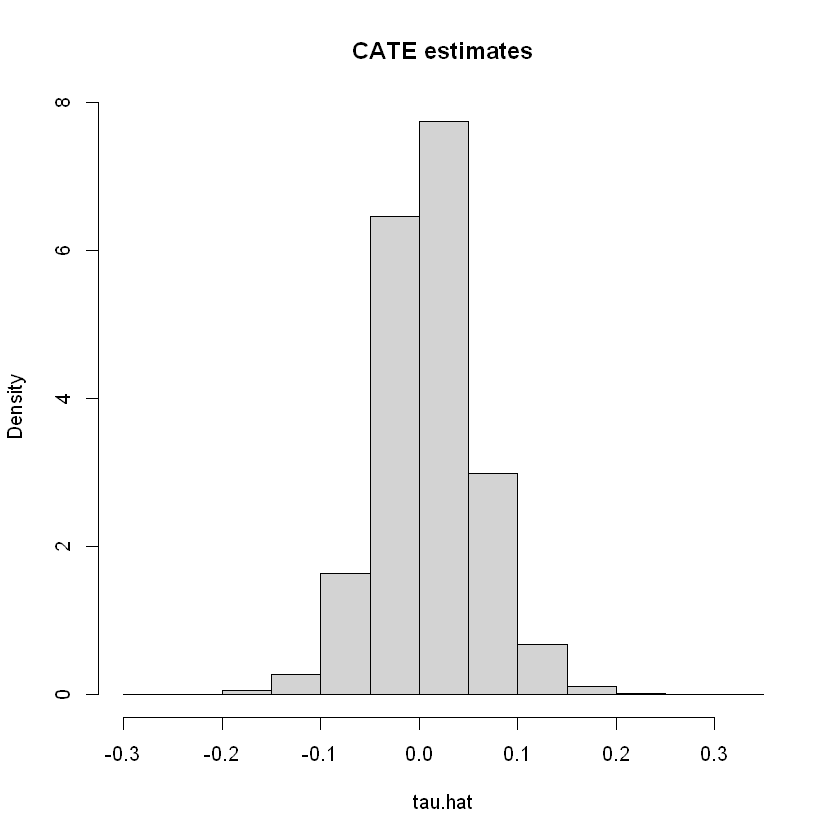

In [239]:
# Do not use this for assessing heterogeneity. See text above.
hist(tau.hat, main="CATE estimates", freq=F)

In [240]:
# measure of variable importance that indicates how often a variable was used in a tree split. 
var_imp <- c(variable_importance(forest.tau))
names(var_imp) <- covariates
sorted_var_imp <- sort(var_imp, decreasing = TRUE)
sorted_var_imp[1:5]  # showing only first few

<NA>      <NA>     level   tenured    cpelec 
0.2734850 0.1891205 0.1526116 0.1145162 0.1038620